In [84]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [85]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("/content/Hotel Bookings (1) (1) (1).csv")

In [86]:
print("size of the data is ",data.shape)
data.head()

size of the data is  (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
#reservation_status_date is an object convert to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [90]:
#unique entities
for col in data.describe(include = 'object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

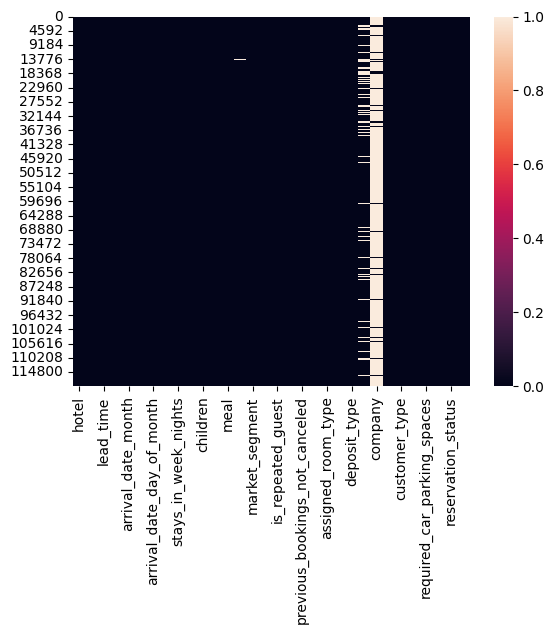

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [91]:
#finding null
sns.heatmap(data.isnull())
plt.show()
data.isnull().sum()

In [92]:
data.fillna(0, inplace = True)

In [93]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [94]:
data = data[~filter]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [95]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,...,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504,2016-07-29 22:20:25.709252864
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,...,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876,NaN


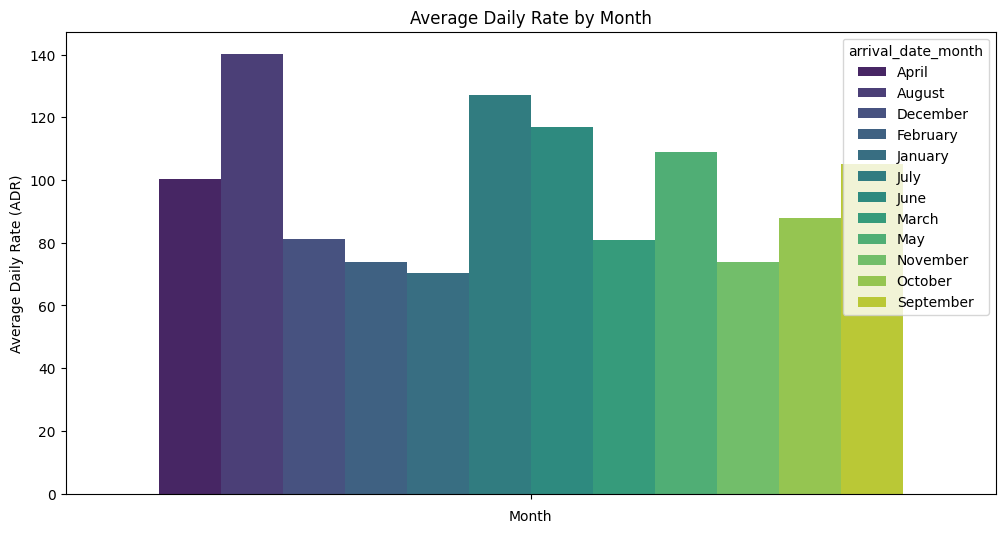

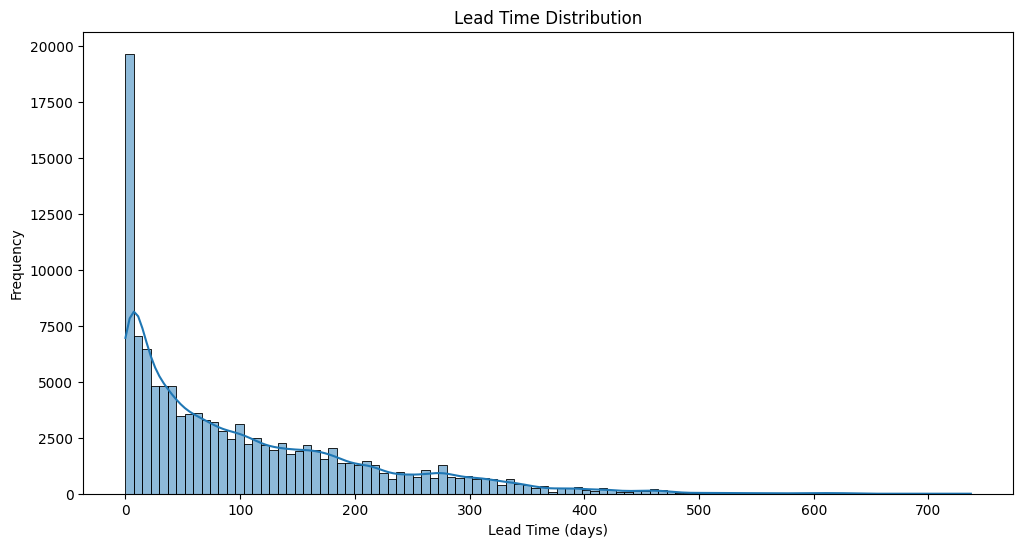

<ipython-input-96-ec1d8641e203>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




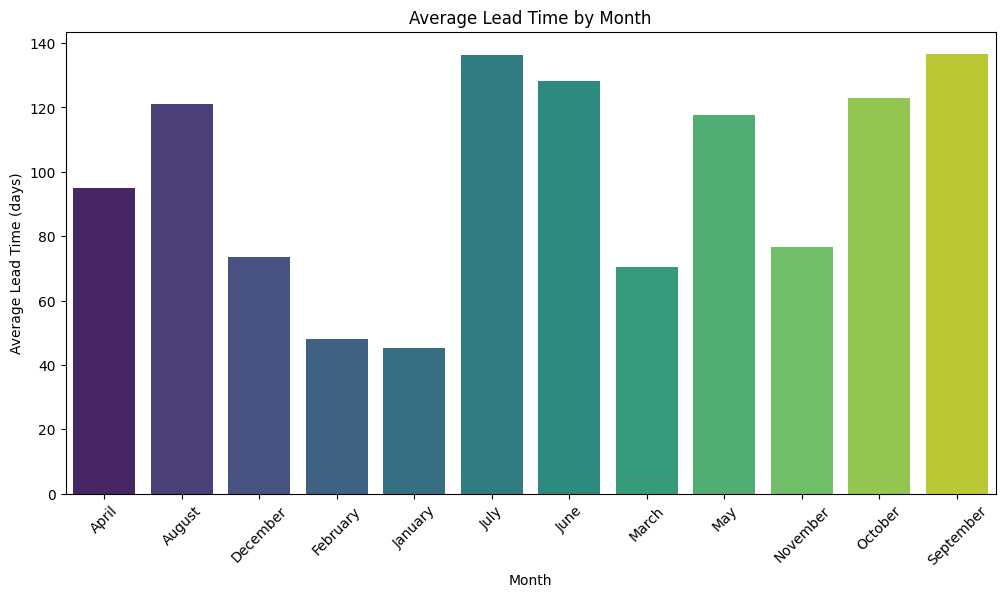

(   arrival_date_month         adr
 0               April  100.468146
 1              August  140.255303
 2            December   81.321256
 3            February   73.717054
 4             January   70.451631
 5                July  126.944704
 6                June  116.761489
 7               March   80.884282
 8                 May  108.771400
 9            November   73.966448
 10            October   88.011401
 11          September  105.127290,
    arrival_date_month   lead_time
 0               April   94.881296
 1              August  121.233028
 2            December   73.671993
 3            February   47.939518
 4             January   45.339639
 5                July  136.336286
 6                June  128.302589
 7               March   70.282146
 8                 May  117.717402
 9            November   76.773593
 10            October  123.066655
 11          September  136.762000)

In [96]:
#find prime time to book a hotel based on lead_time,adr,arival_date_month
# Group by arrival_date_month and calculate the mean adr
monthly_adr = data.groupby('arrival_date_month')['adr'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_adr, hue='arrival_date_month', y='adr', palette='viridis')
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Lead time analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['lead_time'], bins=100, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# Mean lead time by month
monthly_lead_time = data.groupby('arrival_date_month')['lead_time'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_lead_time, x='arrival_date_month', y='lead_time', palette='viridis')
plt.title('Average Lead Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.show()

monthly_adr, monthly_lead_time


<ipython-input-97-3f2a3d6da944>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



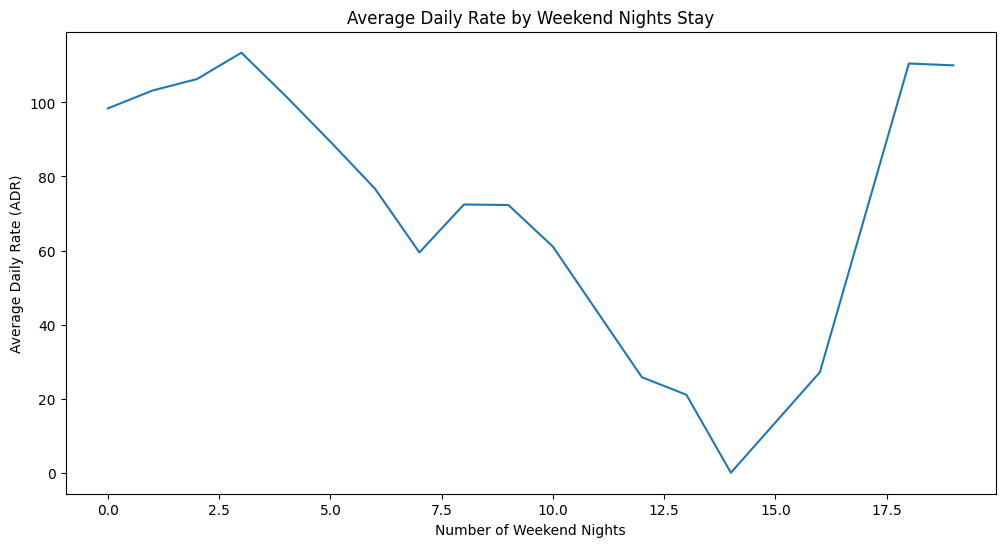

<ipython-input-97-3f2a3d6da944>:17: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



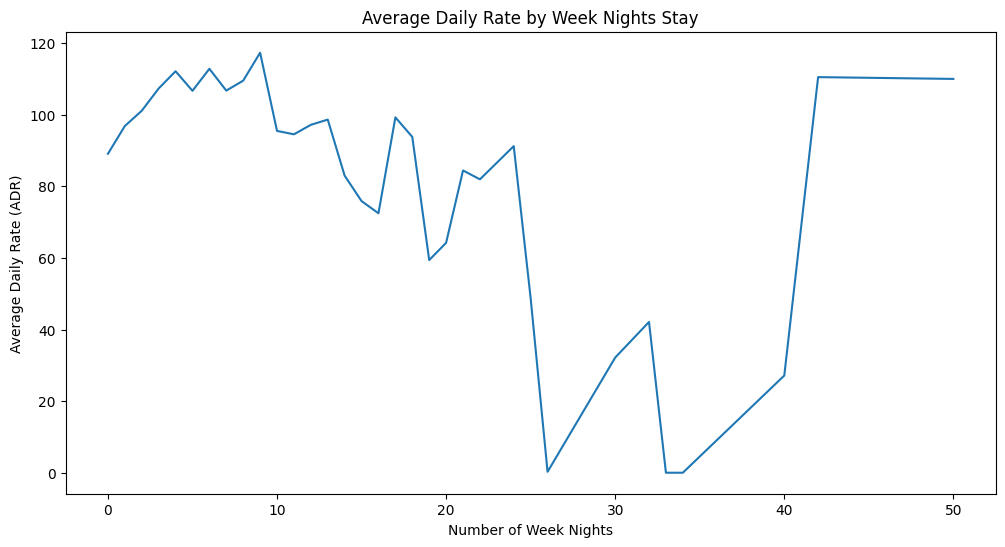

    stays_in_weekend_nights         adr
0                         0   98.373954
1                         1  103.196970
2                         2  106.295214
3                         3  113.412835
4                         4  101.657818
5                         5   89.382338
6                         6   76.727303
7                         7   59.487368
8                         8   72.431552
9                         9   72.290000
10                       10   61.054286
11                       12   25.786000
12                       13   21.055000
13                       14    0.000000
14                       16   27.145000
15                       18  110.500000
16                       19  110.000000
    stays_in_week_nights         adr
0                      0   89.083020
1                      1   96.838888
2                      2  101.100256
3                      3  107.325286
4                      4  112.142461
5                      5  106.676069
6                    

In [97]:
#ideal length of stay for the best rates?
#Calculate the average ADR for different lengths of stay in weekend nights and week nights
weekend_stay_adr = data.groupby('stays_in_weekend_nights')['adr'].mean().reset_index()
week_stay_adr = data.groupby('stays_in_week_nights')['adr'].mean().reset_index()

# Plotting the average ADR for different lengths of stay during weekend nights
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekend_stay_adr, x='stays_in_weekend_nights', y='adr', palette='viridis')
plt.title('Average Daily Rate by Weekend Nights Stay')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=0)
plt.show()

# Plotting the average ADR for different lengths of stay during week nights
plt.figure(figsize=(12, 6))
sns.lineplot(data=week_stay_adr, x='stays_in_week_nights', y='adr', palette='viridis')
plt.title('Average Daily Rate by Week Nights Stay')
plt.xlabel('Number of Week Nights')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=0)
plt.show()

print(weekend_stay_adr)
print(week_stay_adr)


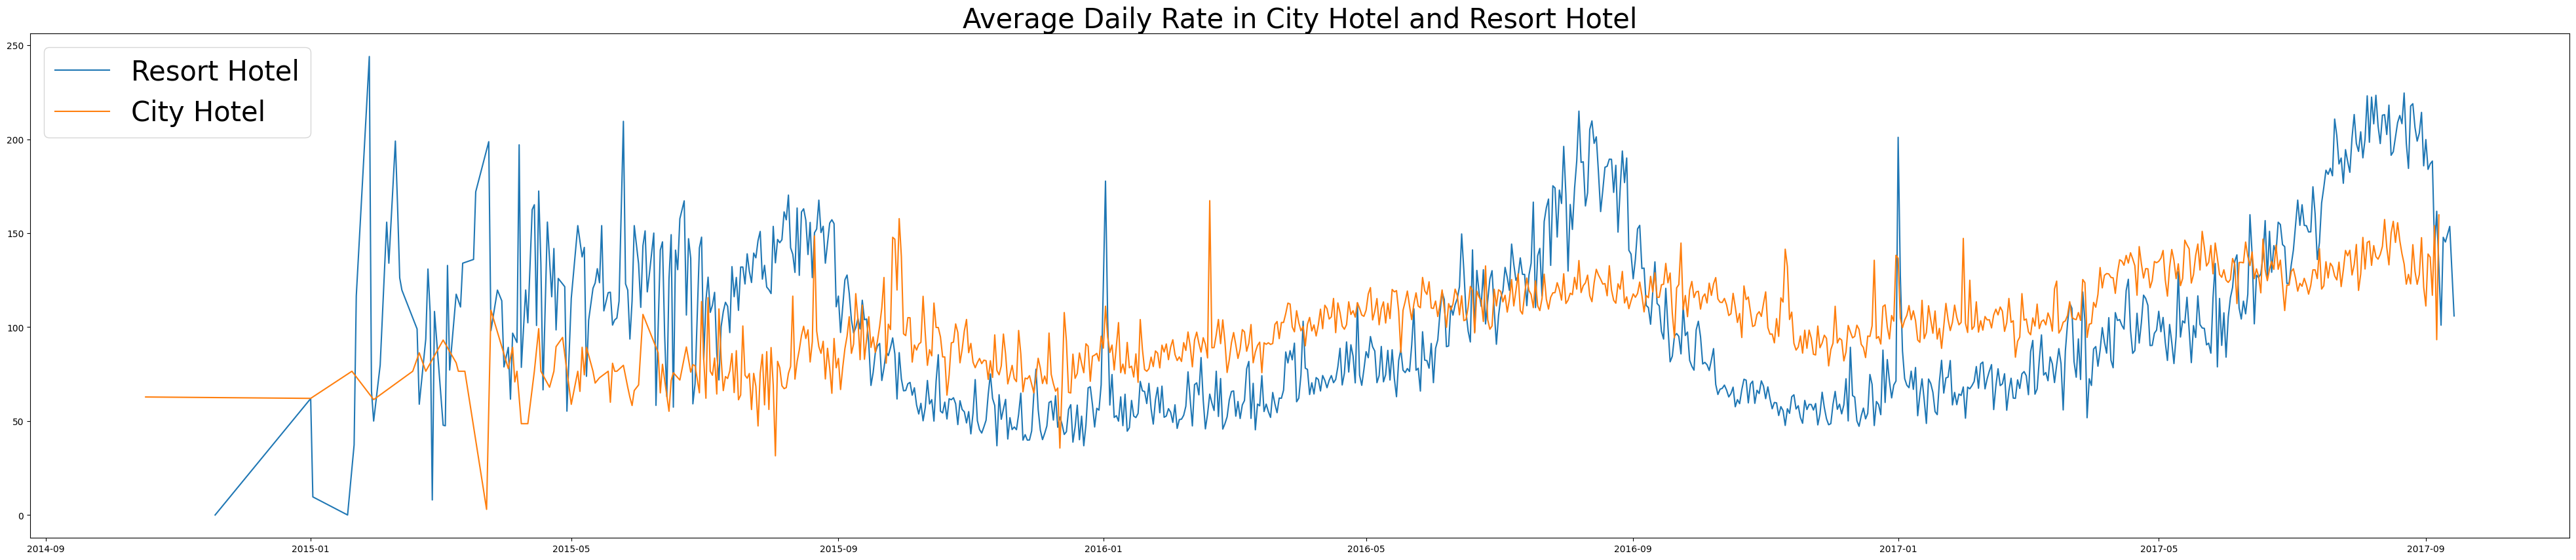

In [98]:
#averge costs in city hotel and resort hotel
#select the data about a specific hotel on the basis on cancellation
resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)
city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

#reservatins done
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (50,10))
plt.title('Average Daily Rate in City Hotel and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 30)
plt.show()

<ipython-input-99-951528e19213>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




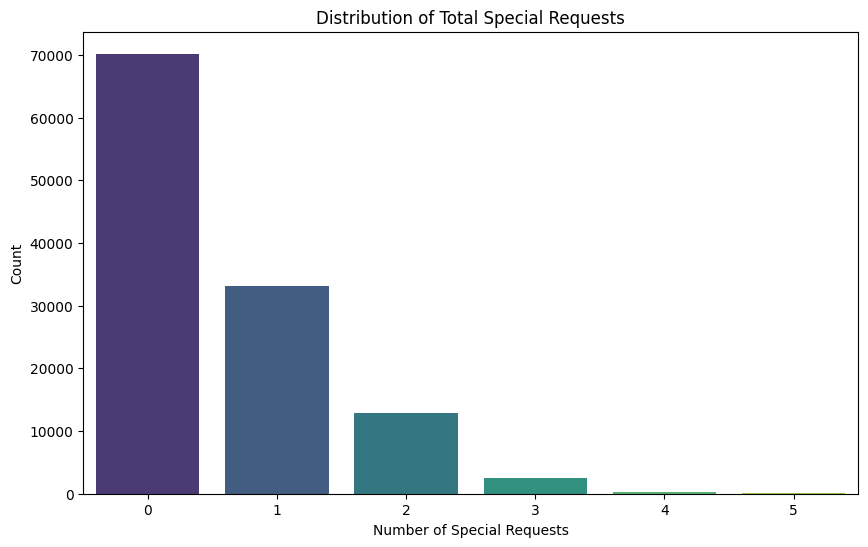

In [99]:
"""To investigate the factors that might lead to a surge in special requests for a hotel, we can perform an analysis on various features :
Type of Hotel
Lead Time
Booking Changes
Customer Type
Arrival Month
Total Number of Nights
ADR (Average Daily Rate)
Market Segment"""

#special request
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='total_of_special_requests', palette='viridis')
plt.title('Distribution of Total Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

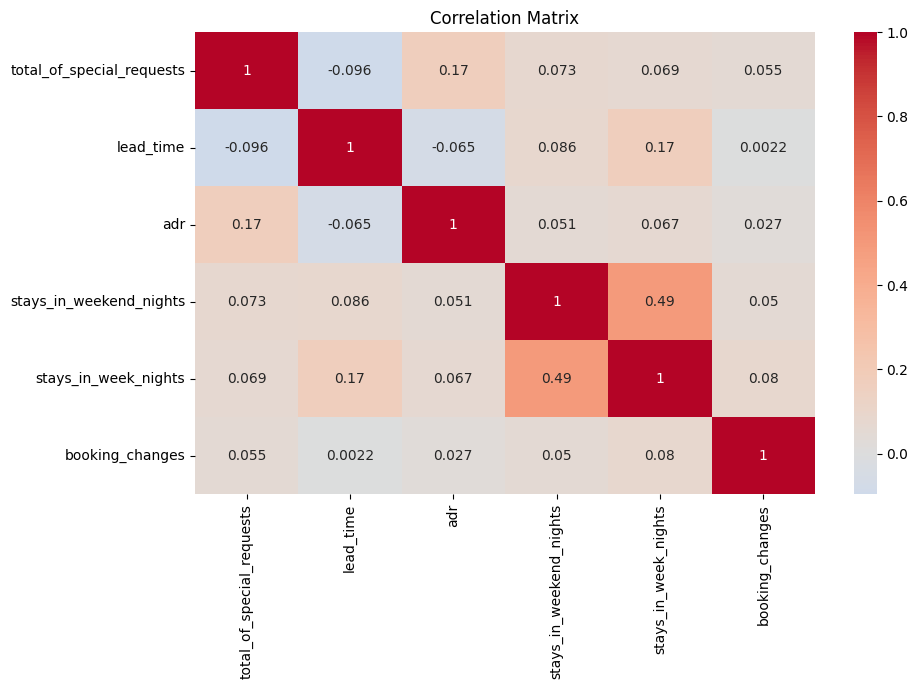

In [100]:
#corealtion between the attributes
correlation_matrix = data[['total_of_special_requests', 'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes']].corr()
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'special requests')

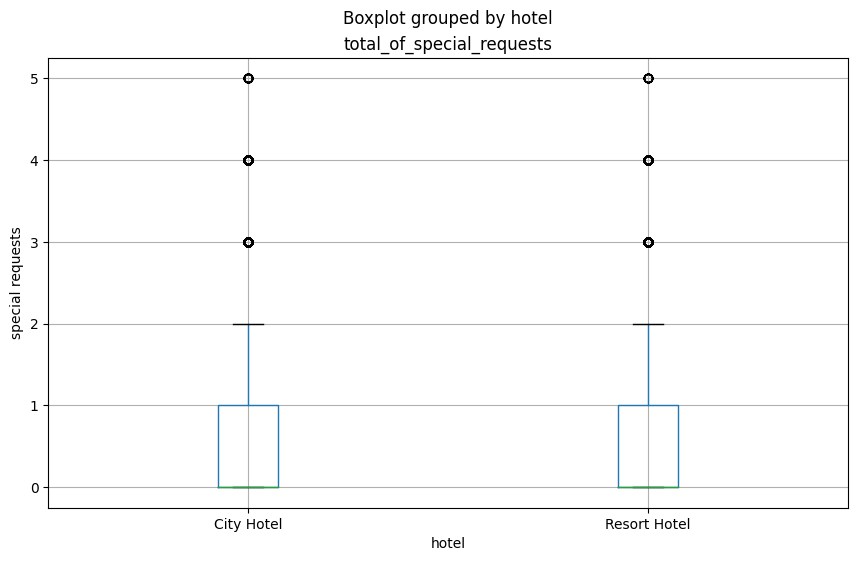

In [101]:
# Analyze the impact of hotel type on special requests
hotel_and_specialrequest=data.boxplot(column='total_of_special_requests', by='hotel',figsize=(10, 6))
plt.ylabel("special requests")

Text(0, 0.5, 'special requests')

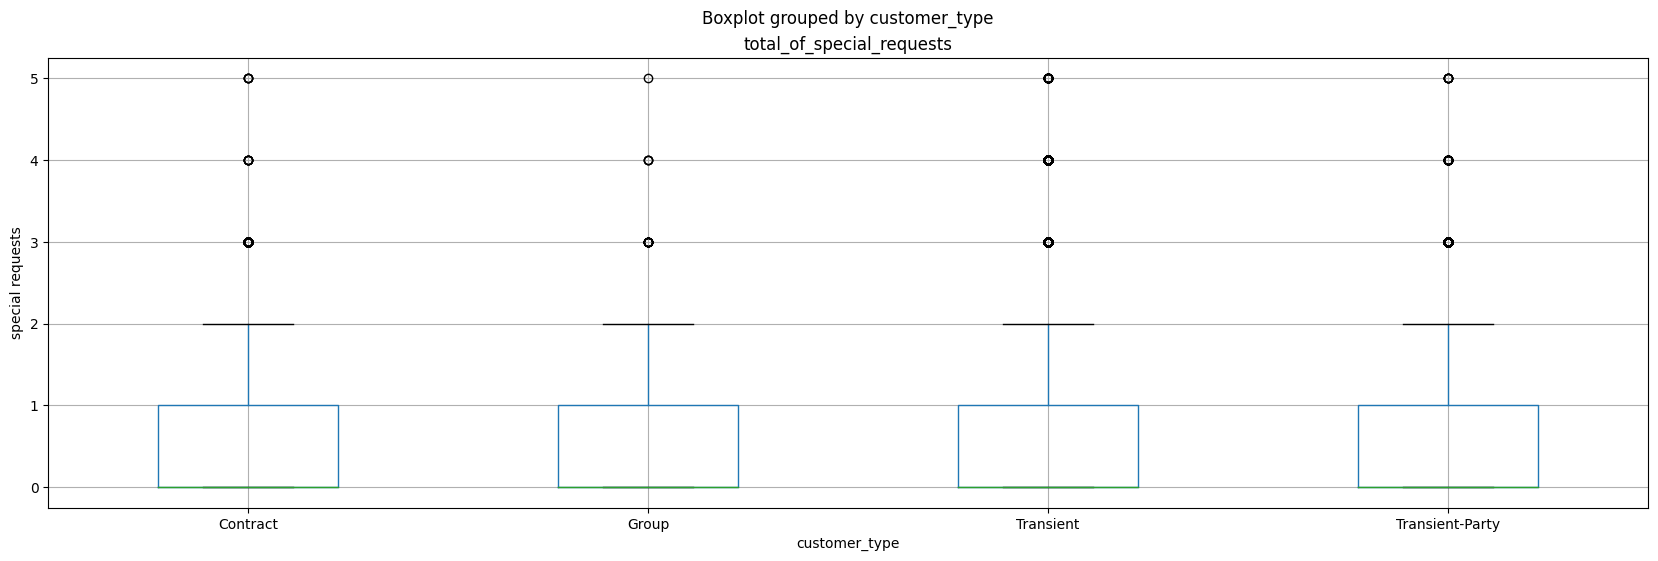

In [102]:
# Analyze the impact of customer type on special requests
custype_and_specialrequest=data.boxplot(column='total_of_special_requests', by='customer_type',figsize=(20, 6))
plt.ylabel("special requests")

Text(0, 0.5, 'special requests')

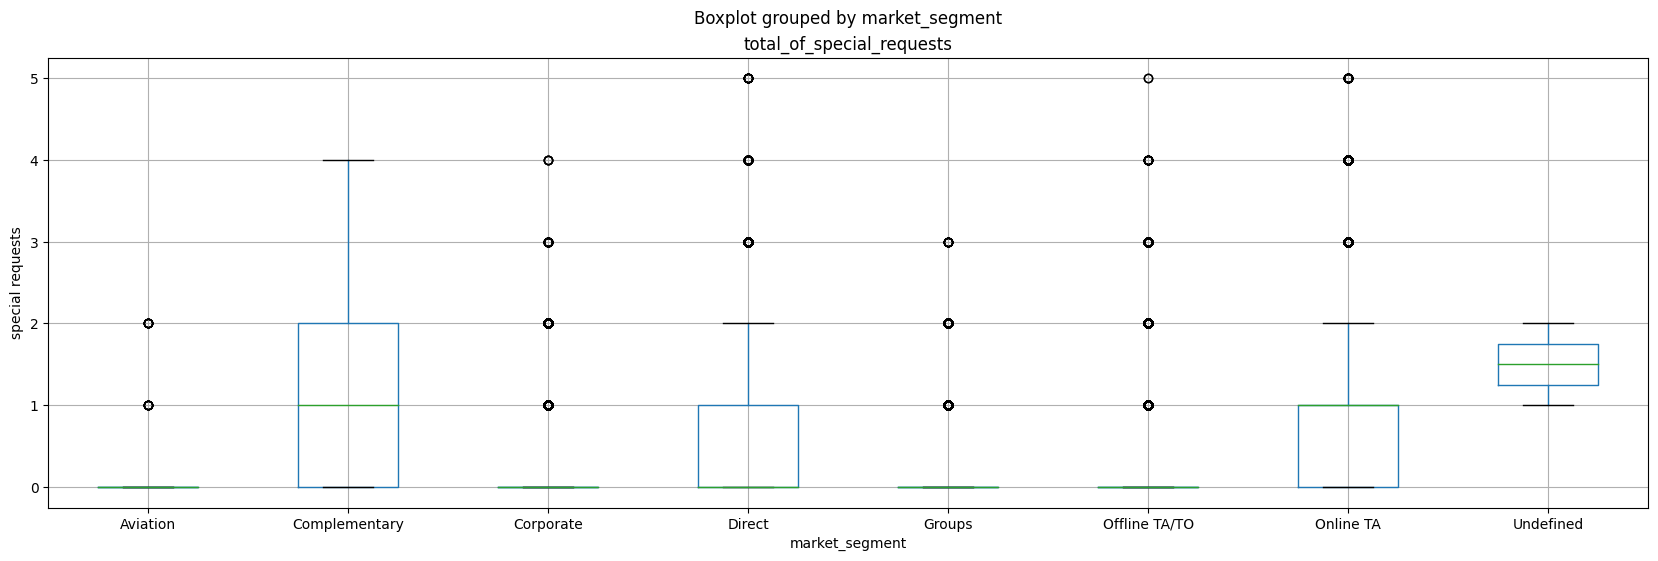

In [103]:
# Analyze the impact of market segment on special requests
marketsegment_and_specialrequest=data.boxplot(column='total_of_special_requests', by='market_segment',figsize=(20, 6))
plt.ylabel("special requests")

Text(0, 0.5, 'special requests')

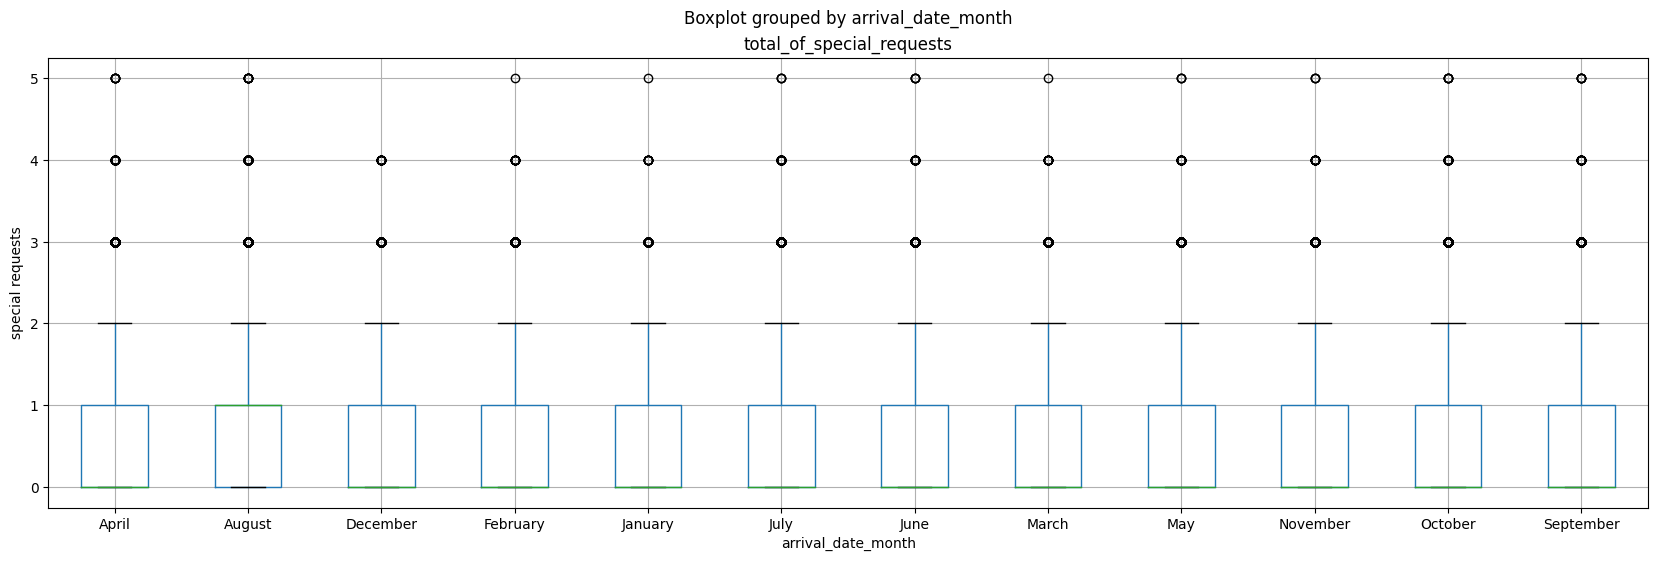

In [104]:
# Analyze the impact of arrival month on special requests
arrivalmonth_and_specialrequest=data.boxplot(column='total_of_special_requests', by='arrival_date_month',figsize=(20, 6))
plt.ylabel("special requests")

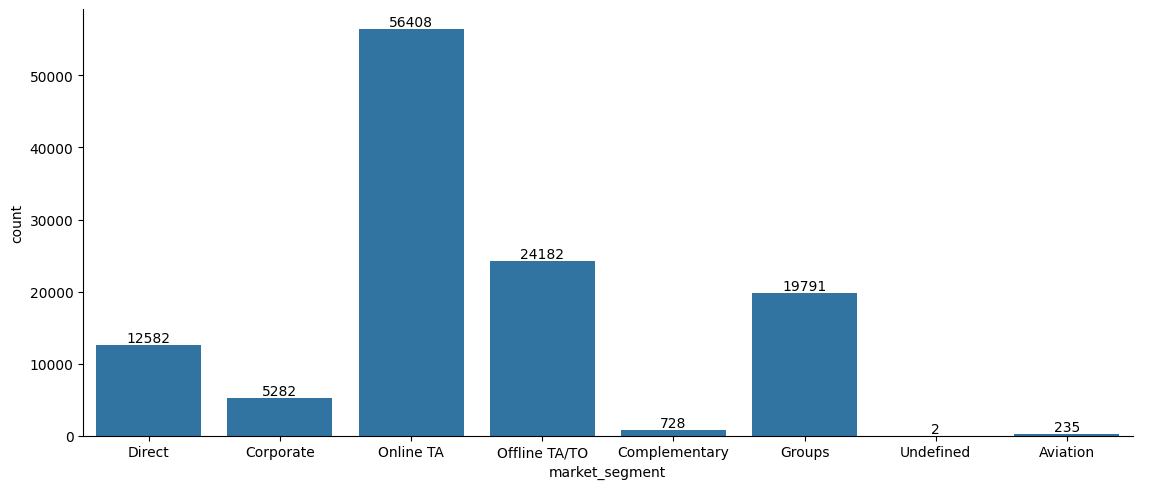

In [105]:
#visualize market segment
market = sns.catplot(x='market_segment', kind='count', data=data, height=5, aspect=2.3)
for ax in market.axes.flat:
  for i in range (len(ax.containers)):
    ax.bar_label(ax.containers[i])


In [106]:
#How does the price vary per night over the year?

data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [107]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [108]:
plt.figure(figsize = (17, 8))
px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1700x800 with 0 Axes>

the price of the resort is more in august and price of the city_hotel is more in the  month of may to august

In [109]:
#How long do people stay at the hotels?
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [110]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,264
1,0,Resort Hotel,381
2,1,City Hotel,13258
3,1,Resort Hotel,7747
4,2,City Hotel,21415
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


In [111]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group')

# **Data** **Preprocessing**



In [112]:
# dropping columns that are not useful
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

data.drop(useless_col, axis = 1, inplace = True)

In [113]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_nights
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02,1
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02,1
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03,2


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_month              119210 non-null  object        
 4   arrival_date_week_number        119210 non-null  int64         
 5   arrival_date_day_of_month       119210 non-null  int64         
 6   stays_in_weekend_nights         119210 non-null  int64         
 7   stays_in_week_nights            119210 non-null  int64         
 8   adults                          119210 non-null  int64         
 9   children                        119210 non-null  float64       
 10  babies                          119210 non-null  int64       

In [115]:
# creating numerical and categorical dataframes
cat_cols = [col for col in data.columns if (data[col].dtype == 'O' or data[col].dtype == 'datetime64[ns]')]
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [116]:
cat_df = data[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [117]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day


<ipython-input-117-1e4155b411ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-1e4155b411ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-1e4155b411ff>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-1e4

In [118]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

<ipython-input-118-243e1afe9ea7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [120]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [121]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

<ipython-input-121-70ce217b434d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-70ce217b434d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-70ce217b434d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-70c

In [122]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [123]:
num_df = data.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,total_nights
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0,1
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0,1
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0,7
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2,7
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4,7
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0,7


In [124]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
total_nights                          6.455117
dtype: float64

In [125]:
# normalizing numerical variables
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



In [126]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
total_nights                      6.455117
dtype: float64

In [127]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,total_nights
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0,1
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0,1
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1,2


In [128]:
X = pd.concat([cat_df, num_df], axis = 1)
y = data['is_canceled']

In [129]:
X.shape, y.shape

((119210, 27), (119210,))

In [130]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [131]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,total_nights
5658,0,0,2,2,3,0,0,2,4,29,...,0,0,0,0,5.493061,0.000000,4.564348,0,0,5
101564,1,0,4,0,5,0,0,2,11,14,...,0,0,0,0,3.828641,0.000000,0.000000,0,0,1
107226,1,0,3,2,1,0,0,3,3,10,...,0,0,0,0,4.890349,0.000000,4.234107,0,0,5
67616,1,3,2,2,1,0,0,3,4,28,...,0,0,0,0,2.302585,0.000000,5.017280,0,1,3
78336,1,0,1,1,1,0,0,3,6,29,...,0,1,4,28,0.000000,3.713572,4.189655,0,0,1


In [132]:
y_train.head()

5658      1
101564    0
107226    0
67616     1
78336     0
Name: is_canceled, dtype: int64

# Model building

In [133]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy Score of Logistic Regression is : 0.8115091015854374
Confusion Matrix : 
[[21343  1196]
 [ 5545  7679]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22539
           1       0.87      0.58      0.69     13224

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



In [134]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Ada Boost Classifier is : 0.9116405223275452
Confusion Matrix : 
[[22379   160]
 [ 3000 10224]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22539
           1       0.98      0.77      0.87     13224

    accuracy                           0.91     35763
   macro avg       0.93      0.88      0.90     35763
weighted avg       0.92      0.91      0.91     35763



In [135]:
#ANN

from tensorflow.keras.utils import to_categorical

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(data['is_canceled'])
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (27, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 50)



Epoch 1/50
2608/2608 [==============================] - 10s 4ms/step - loss: 0.3448 - accuracy: 0.8557 - val_loss: 0.2173 - val_accuracy: 0.9248
Epoch 2/50
2608/2608 [==============================] - 8s 3ms/step - loss: 0.1691 - accuracy: 0.9426 - val_loss: 0.1434 - val_accuracy: 0.9530
Epoch 3/50
2608/2608 [==============================] - 11s 4ms/step - loss: 0.1200 - accuracy: 0.9609 - val_loss: 0.1010 - val_accuracy: 0.9670
Epoch 4/50
2608/2608 [==============================] - 10s 4ms/step - loss: 0.0982 - accuracy: 0.9684 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 5/50
2608/2608 [==============================] - 9s 4ms/step - loss: 0.0845 - accuracy: 0.9731 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 6/50
2608/2608 [==============================] - 9s 3ms/step - loss: 0.0763 - accuracy: 0.9761 - val_loss: 0.0833 - val_accuracy: 0.9723
Epoch 7/50
2608/2608 [==============================] - 9s 3ms/step - loss: 0.0720 - accuracy: 0.9772 - val_loss: 0.0630 - val_accura

In [136]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [137]:
plt.figure(figsize = (12, 6))
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(1, 51)
accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})
px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>